# Data Collection

Import Libraries

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline


%matplotlib inline

Load dataset

In [43]:
!gdown --id "1ckT-m7qnsYn2Kda43XvDfSyik3Dsng8f"

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ckT-m7qnsYn2Kda43XvDfSyik3Dsng8f
To: /content/transfusion.csv
100% 12.8k/12.8k [00:00<00:00, 27.9MB/s]


Read dataset

In [44]:
df = pd.read_csv("/content/transfusion.csv")
df.head()

Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250             28   
2                 1                 16                   4000             35   
3                 2                 20                   5000             45   
4                 1                 24                   6000             77   

   whether he/she donated blood in March 2007  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           0

# Data Understanding

Informasi bentuk dataset

In [45]:
df.shape

(748, 5)

Informasi dataset

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


Informasi statistik deskriptif dataset

In [47]:
df.describe()

Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
count        748.000000         748.000000             748.000000   
mean           9.506684           5.514706            1378.676471   
std            8.095396           5.839307            1459.826781   
min            0.000000           1.000000             250.000000   
25%            2.750000           2.000000             500.000000   
50%            7.000000           4.000000            1000.000000   
75%           14.000000           7.000000            1750.000000   
max           74.000000          50.000000           12500.000000   

       Time (months)  whether he/she donated blood in March 2007  
count     748.000000                                  748.000000  
mean       34.282086                                    0.237968  
std        24.376714                                    0.426124  
min         2.000000                                    0.000000  
25%        16.000000                                    0.000000  
50%        28.000000                                    0.000000  
75%        50.000000                                    0.000000  
max        98.000000                                    1.000000

# Handling Missing Value

Pengecekan missing value

In [48]:
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

# Handling Outliers

Menghitung z-score untuk mengecek outlier

In [49]:
from scipy import stats

# Statistical Method: Z-score
z_scores = stats.zscore(df.select_dtypes(include=[np.number]))
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)
print("Outliers detected using Z-score method:")
print(df[outliers])

Outliers detected using Z-score method:
Empty DataFrame
Columns: [Recency (months), Frequency (times), Monetary (c.c. blood), Time (months), whether he/she donated blood in March 2007]
Index: []


Memvisualisasikan outlier dengan boxplot

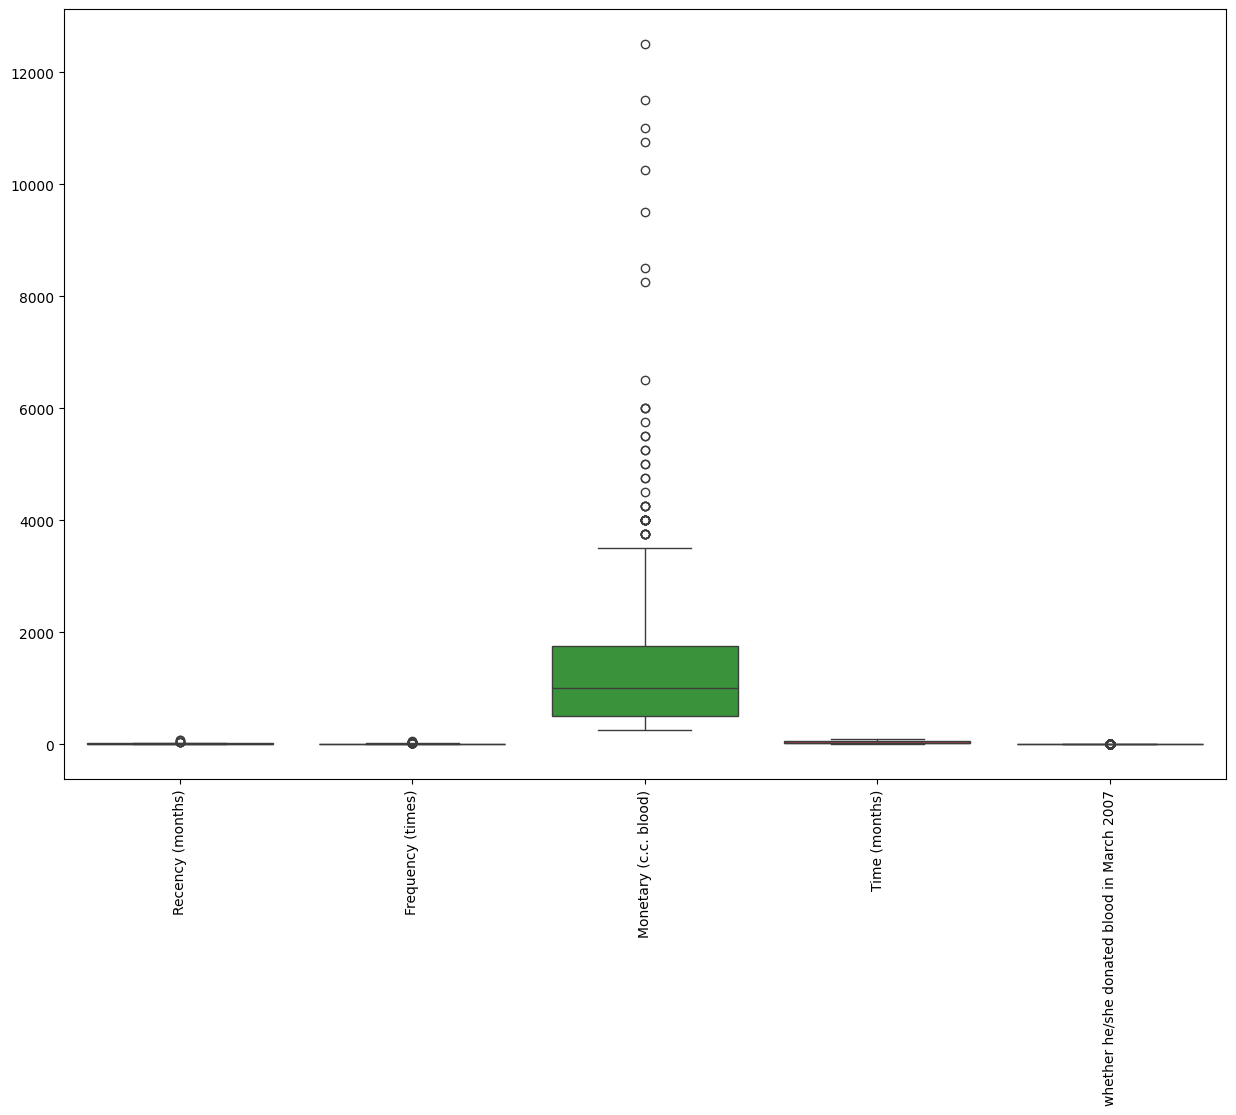

In [50]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Data Preparation

Handling outlier dengan berdasarkan z-score

In [51]:
# Menghapus outlier berdasarkan Z-Score
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
    df_filtered = df[(z_scores < threshold).all(axis=1)]
    return df_filtered

# Menghapus outliers dengan Z-Score
df_filtered = remove_outliers_zscore(df)

df_filtered.shape

(729, 5)

Cek distribusi kelas sesudah handling outlier

In [52]:
# Cek distribusi kelas sesudah handling outlier
print("Distribusi kelas setelah handling outlier:")
print(df_filtered['whether he/she donated blood in March 2007'].value_counts())

Distribusi kelas setelah handling outlier:
whether he/she donated blood in March 2007
0    558
1    171
Name: count, dtype: int64


Membagi data sebagai fitur dan target

In [53]:
# Fitur dan target
X = df_filtered.drop(columns=['whether he/she donated blood in March 2007'])
y = df_filtered['whether he/she donated blood in March 2007']

Split data train dan test

In [54]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Cek seluruh data, train data, dan test data

In [55]:
print(f'Total of sample in whole dataset: {len(X)}')
print(f'Total of sample in train dataset: {len(X_train)}')
print(f'Total of sample in test dataset: {len(X_test)}')

Total of sample in whole dataset: 729
Total of sample in train dataset: 583
Total of sample in test dataset: 146


# Modeling

Modeling dengan SVM

In [56]:
# Modeling dengan SVM
svm_model = SVC()
param_dist_svm = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
random_search_svm = RandomizedSearchCV(svm_model, param_distributions=param_dist_svm, n_iter=10, cv=5, random_state=42, n_jobs=-1)

Normalisasi data pada model SVM

In [57]:
# Normalisasi data
pipeline = make_pipeline(StandardScaler(), random_search_svm)
pipeline.fit(X_train, y_train)
svm_best_model = pipeline.named_steps['randomizedsearchcv'].best_estimator_

In [58]:
print("Best SVM model:", svm_best_model)

Best SVM model: SVC(C=10, gamma='auto')


Modeling dengan KNN

In [59]:
# Modeling dengan KNN
knn_model = KNeighborsClassifier()
param_dist_knn = {'n_neighbors': [3, 5, 7, 9, 11]}
random_search_knn = RandomizedSearchCV(knn_model, param_distributions=param_dist_knn, n_iter=5, cv=5, random_state=42, n_jobs=-1)

Normalisasi data pada model KNN

In [60]:
# Normalisasi data
pipeline = make_pipeline(StandardScaler(), random_search_knn)
pipeline.fit(X_train, y_train)
knn_best_model = pipeline.named_steps['randomizedsearchcv'].best_estimator_

In [61]:
print("Best KNN model:", knn_best_model)

Best KNN model: KNeighborsClassifier(n_neighbors=9)


## Hyperparams pada SVM

Membuat hyperparams pada model SVM

In [62]:
# Hyperparams pada SVM
svm_eval = SVC()
param_dist_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'max_iter': [100, 200, 300]
}

random_search_svm = RandomizedSearchCV(estimator=svm_eval, param_distributions=param_dist_svm, n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search_svm.fit(X_train, y_train)
svm_best_model = random_search_svm.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [63]:
print("Best Parameters for SVM:", random_search_svm.best_params_)
print("Best Score for SVM:", random_search_svm.best_score_)

Best Parameters for SVM: {'max_iter': 200, 'kernel': 'rbf', 'gamma': 'scale', 'C': 0.1}
Best Score for SVM: 0.765016209843796


## Hyperparams pada KNN

Membuat hyperparams pada model KNN

In [64]:
# Hyperparams pada KNN
knn_eval = KNeighborsClassifier()
param_dist_knn = {
    'n_neighbors': [3, 5, 7, 9, 11]
}

random_search_knn = RandomizedSearchCV(estimator=knn_eval, param_distributions=param_dist_knn, n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search_knn.fit(X_train, y_train)
knn_best_model = random_search_knn.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [65]:
print("Best Parameters for KNN:", random_search_knn.best_params_)
print("Best Score for KNN:", random_search_knn.best_score_)

Best Parameters for KNN: {'n_neighbors': 9}
Best Score for KNN: 0.7822133804892425


# Evaluation

Membuat dataframe untuk hasil evaluasi

In [66]:
# Membuat dataframe untuk hasil evaluasi
result = pd.DataFrame(index=['accuracy_train', 'accuracy_test', 'precision_train', 'precision_test',
                             'recall_train', 'recall_test', 'f1_score_train', 'f1_score_test'],
                      columns=['SVM', 'KNN'])

Mengevaluasi model SVM

In [67]:
svm_train_preds = svm_best_model.predict(X_train)
svm_test_preds = svm_best_model.predict(X_test)

In [68]:
# Menghitung metrik evaluasi untuk SVM
svm_accuracy_train = accuracy_score(y_train, svm_train_preds)
svm_accuracy_test = accuracy_score(y_test, svm_test_preds)

svm_precision_train = precision_score(y_train, svm_train_preds)
svm_precision_test = precision_score(y_test, svm_test_preds)

svm_recall_train = recall_score(y_train, svm_train_preds)
svm_recall_test = recall_score(y_test, svm_test_preds)

svm_f1_train = f1_score(y_train, svm_train_preds)
svm_f1_test = f1_score(y_test, svm_test_preds)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
# Mengisi dataframe dengan nilai metrik evaluasi SVM
result.loc['accuracy_train', 'SVM'] = svm_accuracy_train
result.loc['accuracy_test', 'SVM'] = svm_accuracy_test
result.loc['precision_train', 'SVM'] = svm_precision_train
result.loc['precision_test', 'SVM'] = svm_precision_test
result.loc['recall_train', 'SVM'] = svm_recall_train
result.loc['recall_test', 'SVM'] = svm_recall_test
result.loc['f1_score_train', 'SVM'] = svm_f1_train
result.loc['f1_score_test', 'SVM'] = svm_f1_test

Mengevaluasi model KNN

In [70]:
knn_train_preds = knn_best_model.predict(X_train)
knn_test_preds = knn_best_model.predict(X_test)

In [71]:
# Menghitung metrik evaluasi untuk KNN
knn_accuracy_train = accuracy_score(y_train, knn_train_preds)
knn_accuracy_test = accuracy_score(y_test, knn_test_preds)

knn_precision_train = precision_score(y_train, knn_train_preds)
knn_precision_test = precision_score(y_test, knn_test_preds)

knn_recall_train = recall_score(y_train, knn_train_preds)
knn_recall_test = recall_score(y_test, knn_test_preds)

knn_f1_train = f1_score(y_train, knn_train_preds)
knn_f1_test = f1_score(y_test, knn_test_preds)

In [72]:
# Mengisi dataframe dengan nilai metrik evaluasi KNN
result.loc['accuracy_train', 'KNN'] = knn_accuracy_train
result.loc['accuracy_test', 'KNN'] = knn_accuracy_test
result.loc['precision_train', 'KNN'] = knn_precision_train
result.loc['precision_test', 'KNN'] = knn_precision_test
result.loc['recall_train', 'KNN'] = knn_recall_train
result.loc['recall_test', 'KNN'] = knn_recall_test
result.loc['f1_score_train', 'KNN'] = knn_f1_train
result.loc['f1_score_test', 'KNN'] = knn_f1_test

Hasil evaluasi

In [73]:
# Hasil evaluasi ulang
result

SVM       KNN
accuracy_train   0.765009  0.806175
accuracy_test    0.767123  0.760274
precision_train       0.0  0.657895
precision_test        0.0  0.473684
recall_train          0.0  0.364964
recall_test           0.0  0.264706
f1_score_train        0.0  0.469484
f1_score_test         0.0  0.339623

Visualisasi hasil

<Axes: >

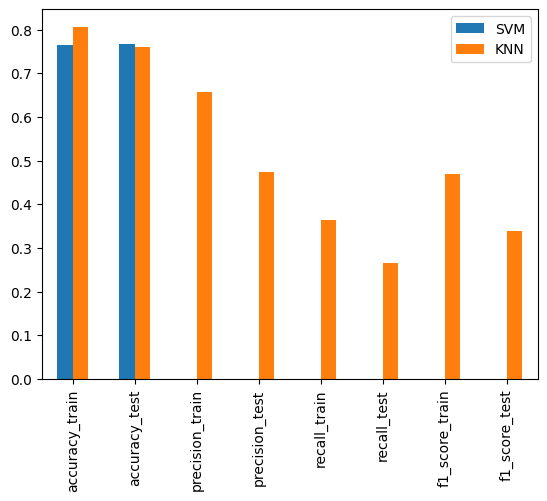

In [74]:
result.plot(kind='bar')